In [83]:
from pathlib import Path

from imports_paper_plots import *
from bioRNN.utils import make_bioRRNs, AVAILABLE_CONNECTOMES, load_connectome

set_context_and_font()
set_rcParams_color()


In [84]:
dir_res = Path(os.environ["DATAICNS"]) / "bioRNN"
figs_path = dir_res/"figs/methods"
figs_path

Path('//mnt/91114856-a405-4086-bfbb-6c0bb5854f13/fdamicel/data/icns/bioRNN/figs/methods')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


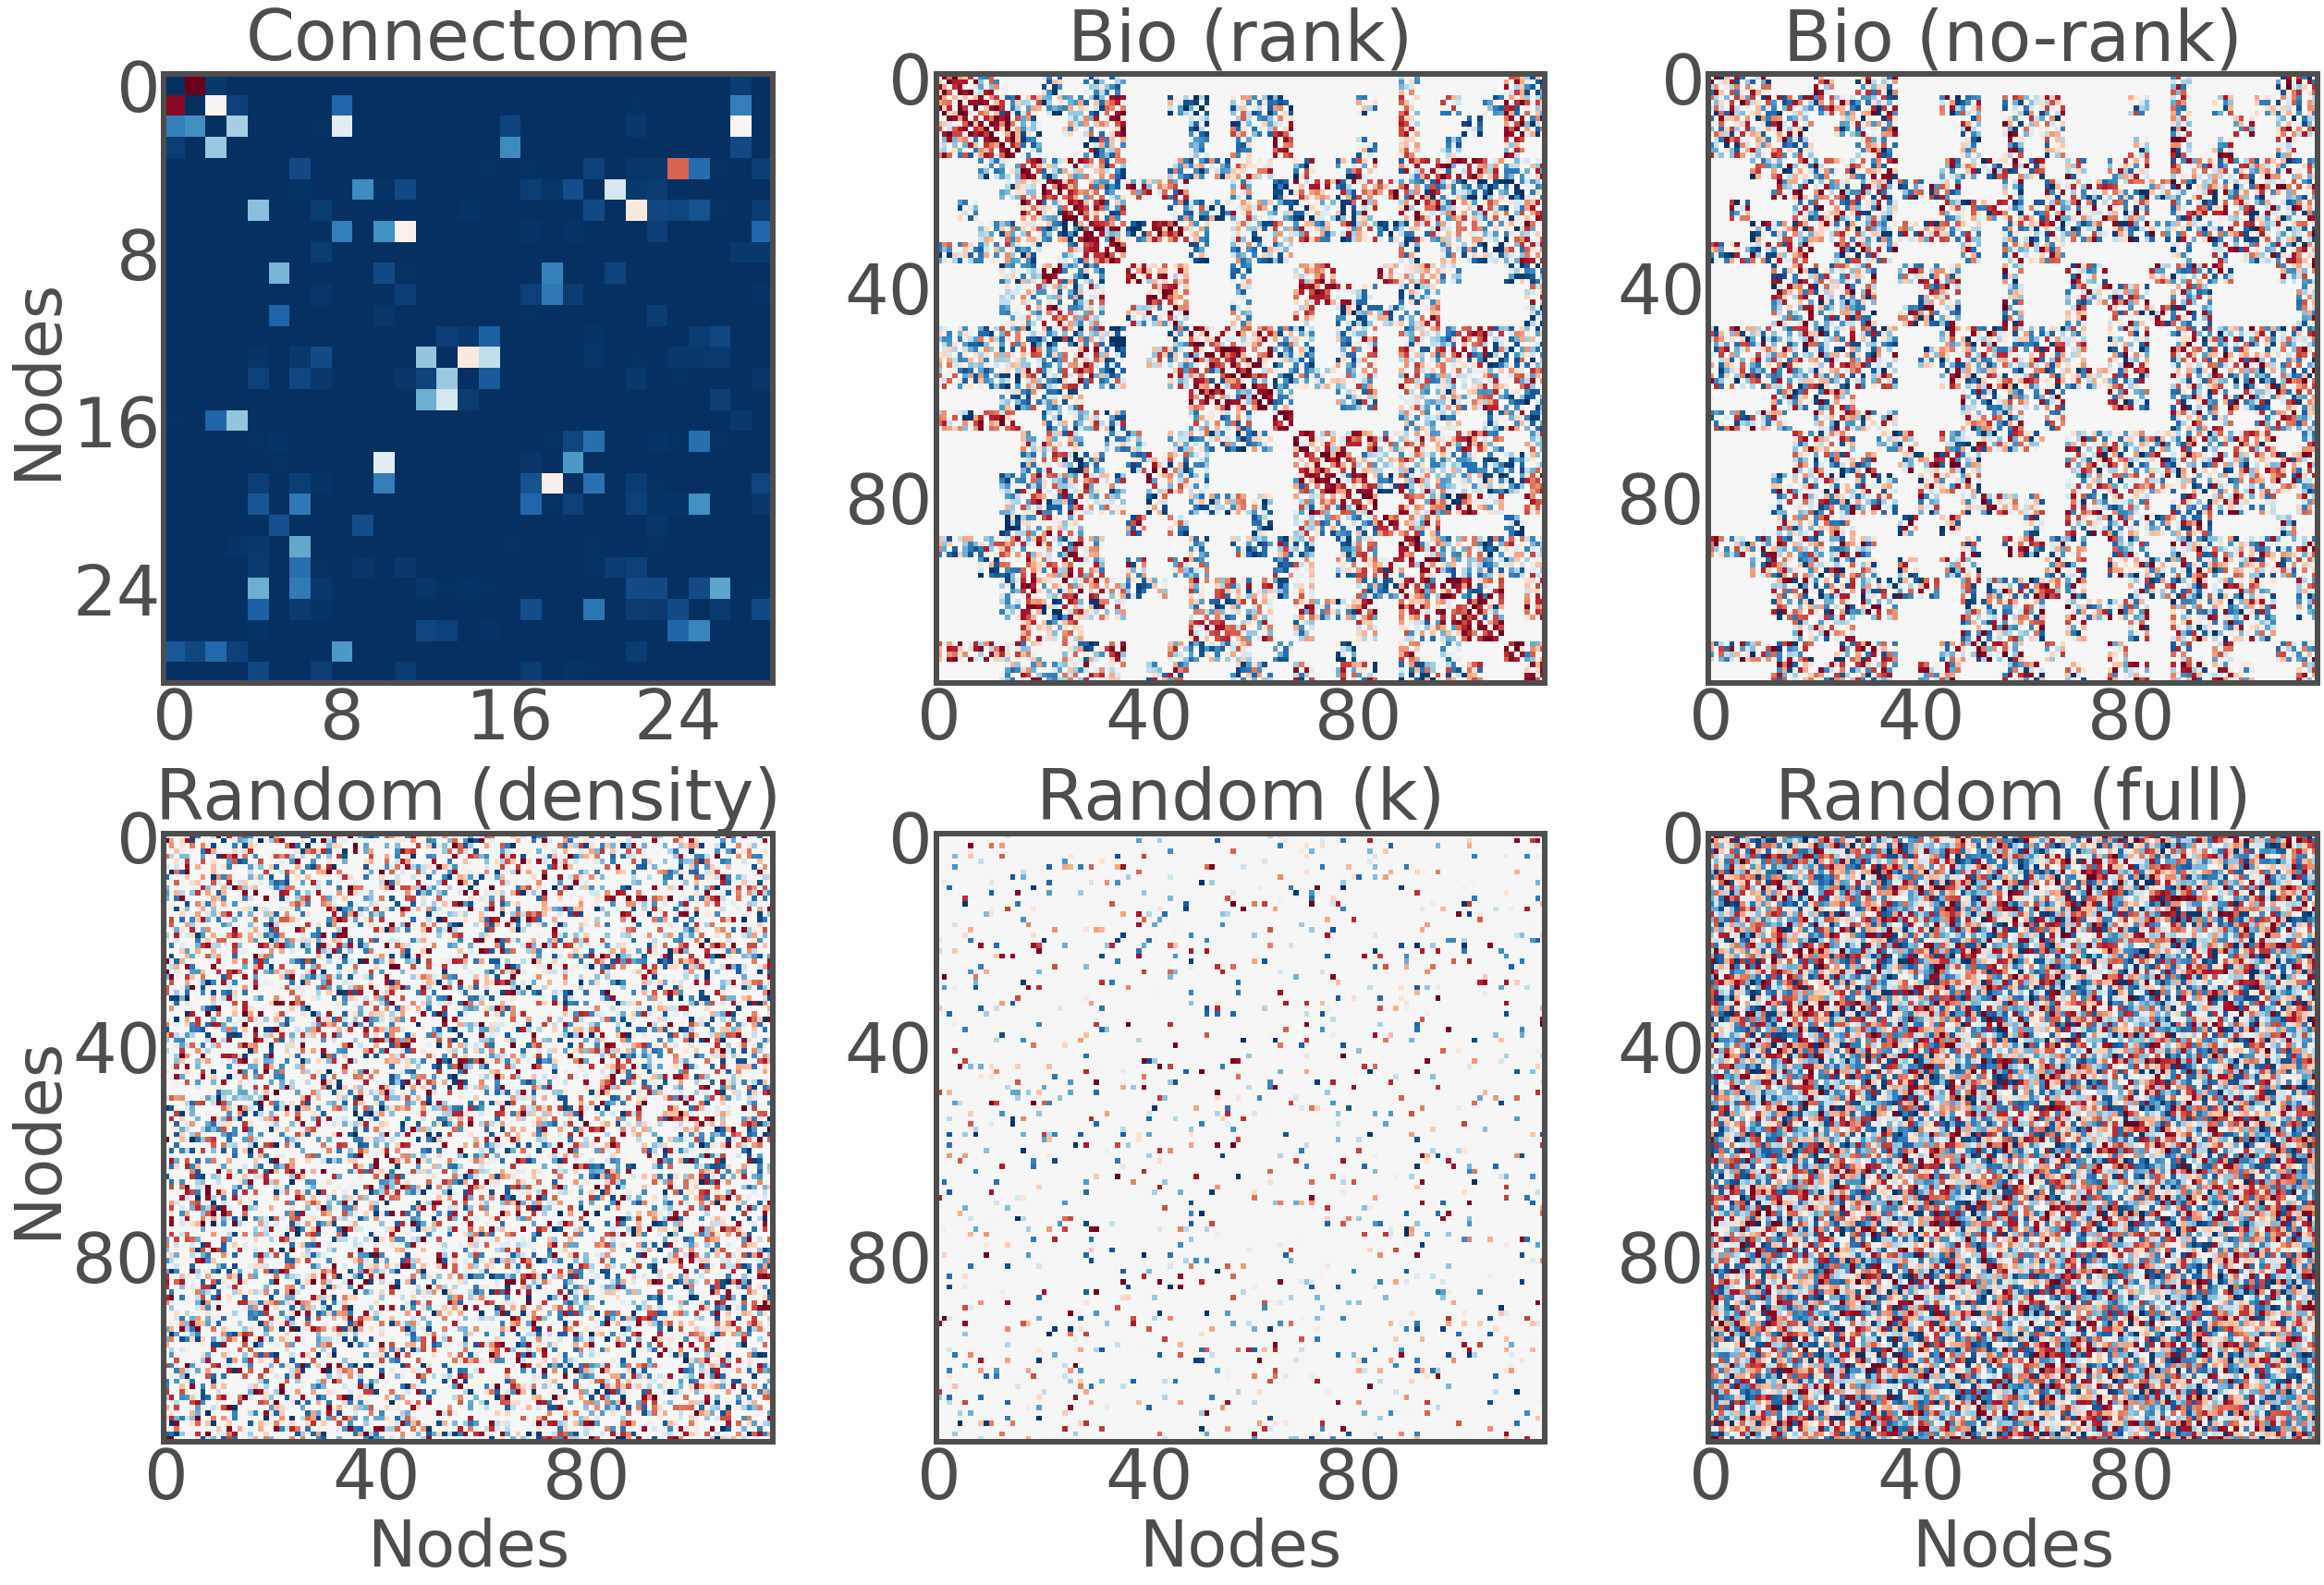

In [79]:
plt.rcParams["ytick.labelsize"] = 75
plt.rcParams["xtick.labelsize"] = 75

connectome_names = ["macaque",]# "marmoset", "human"]

for connectome_name in connectome_names:
    Ws = make_bioRRNs(connectome_name=connectome_name, neuron_density=4, rand_partition=True)
    original = load_connectome(connectome_name)
    Ws = {**{"original": original}, **Ws}
    names_map["original"] = "Connectome"
    
    fig, axes = plt.subplots(ncols=3,
                             nrows=2,
                             figsize=(36, 24),
                             constrained_layout=False,)
                             
    for (W_name, W), ax in zip(Ws.items(), axes.flat):
        img = ax.imshow(W, cmap="RdBu_r", interpolation="none")
        ax.set_title(names_map[W_name], fontsize=76)
        ax.tick_params(axis='both', which='both', length=0)

        if W_name == "original":
            ax.set_xticks(range(0, len(W), 8))
            ax.set_yticks(range(0, len(W), 8))
        else: 
            ax.set_xticks(range(0, len(W), 40))
            ax.set_yticks(range(0, len(W), 40))
        if W_name in ["original", "W_rnd_density"]:
            ax.set_ylabel("Nodes", fontsize=70)
        if W_name in ["W_rnd_density", "W_rnd_k", "W_rnd_full"]:
            ax.set_xlabel("Nodes", fontsize=70)
set_spines_width(axes, width=6)
fig.tight_layout(w_pad=.5, pad=.5)
plt.savefig(figs_path/"adjmats_bioESN.svg")
plt.savefig(figs_path/"adjmats_bioESN.png",)